<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

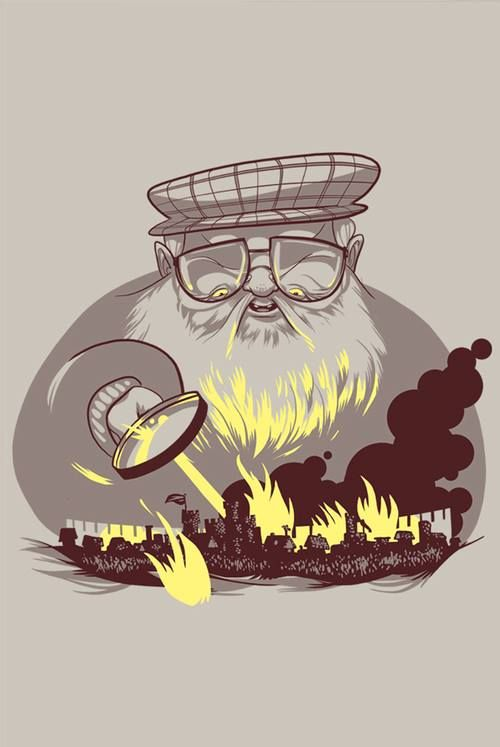

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 38.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 53.6MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
df_train = pd.read_csv("/content/game_of_thrones_train.csv", index_col='S.No')
df_train.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [5]:
house_corrections = {
    'Targaryen': ['House Targaryen'],
    'Frey': ['House Frey', 'House Frey of Riverrun'],
    'Swyft': ['House Swyft'],
    'Arryn': ['House Arryn'],
    'Santagar': ['House Santagar'],
    'Baratheon': ['House Baratheon', 'House Baratheon of Dragonstone', "House Baratheon of King's Landing"],
    'Osgrey': ['House Osgrey'],
    'Greyjoy': ['House Greyjoy'],
    'Stark': ['House Stark'],
    'Waynwood': ['House Waynwood'],
    'Dayne': ['House Dayne'],
    'Manderly': ['House Manderly'],
    'Farwynd': ['House Farwynd of the Lonely Light', 'House Farwynd'],
    'Velaryon': ['House Velaryon'],
    'Tallhart': ['House Tallhart'],
    'Tyrell': ['House Tyrell'],
    'Blackwood': ['House Blackwood'],
    'Blackfyre': ['House Blackfyre'],
    'Vance': ['House Vance', "House Vance of Wayfarer's Rest", 'House Vance of Atranta'],
    'Royce': ['House Royce', 'House Royce of the Gates of the Moon'],
    'Nayland': ['House Nayland'],
    'Rowan': ['House Rowan'],
    'Ryswell': ['House Ryswell'],
    'Lannister': ['House Lannister', 'House Lannister of Lannisport', 'House Lannister of Casterly Rock'],
    'Crakehall': ['House Crakehall'],
    'Darklyn': ['House Darklyn'],
    'Westerling': ['House Westerling'],
    'Connington': ['House Connington'],
    'Stout': ['House Stout'],
    'Drumm': ['House Drumm'],
    'Webber': ['House Webber'],
    'Blackmont': ['House Blackmont'],
    'Bolton': ['House Bolton'],
    'Clegane': ['House Clegane'],
    'Martell': ['House Martell', 'House Nymeros Martell'],
    'Tarly': ['House Tarly'],
    'Reed': ['House Reed'],
    'Fossoway': ['House Fossoway', 'House Fossoway of Cider Hall', 'House Fossoway of New Barrel'],
    'Hightower': ['House Hightower'],
    'Oakheart': ['House Oakheart'],
    'Dalt': ['House Dalt'],
    'Bracken': ['House Bracken'],
    'Whent': ['House Whent'],
    'Tarth': ['House Tarth'],
    'Hollard': ['House Hollard'],
    'Paege': ['House Paege'],
    'Ashford': ['House Ashford'],
    'Brax': ['House Brax'],
    'Redfort': ['House Redfort'],
    'Plumm': ['House Plumm'],
    'Redwyne': ['House Redwyne'],
    'Harlaw': ['House Harlaw', 'House Harlaw of Harlaw Hall', 'House Harlaw of Harridan Hill', 'House Harlaw of the Tower of Glimmering'],
    'Umber': ['House Umber'],
    'Penny': ['House Penny'],
    'Yronwood': ['House Yronwood'],
    'Coldwater': ['House Coldwater'],
    'Templeton': ['House Templeton'],
    'Mormont': ['House Mormont'],
    'Flint': ['House Flint', "House Flint of Widow's Watch"],
    'Poole': ['House Poole'],
    'Blount': ['House Blount'],
    'Suggs': ['House Suggs'],
    'Drinkwater': ['House Drinkwater'],
    'Glover': ['House Glover'],
    'Hunter': ['House Hunter'],
    'Locke': ['House Locke'],
    'Blackbar': ['House Blackbar'],
    'Strong': ['House Strong'],
    'Chester': ['House Chester'],
    'Ruttiger': ['House Ruttiger'],
    'Thorne': ['House Thorne'],
    'Longthorpe': ['House Longthorpe'],
    'Farman': ['House Farman'],
    'Wells': ['House Wells'],
    'Toyne': ['House Toyne'],
    'Liddle': ['House Liddle'],
    'Sunderland': ['House Sunderland'],
    'Uller': ['House Uller'],
    'Tollett': ['House Tollett'],
    'Mullendore': ['House Mullendore'],
    'Mallery': ['House Mallery'],
    'Selmy': ['House Selmy'],
    'Volmark': ['House Volmark'],
    'Crane': ['House Crane'],
    'Sarsfield': ['House Sarsfield'],
    'Jordayne': ['House Jordayne'],
    'Banefort': ['House Banefort'],
    'Ball': ['House Ball'],
    'Cox': ['House Cox'],
    'Rykker': ['House Rykker'],
    'Moreland': ['House Moreland'],
    'Hogg': ['House Hogg'],
    'Wull': ['House Wull'],
    'Gargalen': ['House Gargalen'],
    'Mudd': ['House Mudd'],
    'Farwynd': ['House Farwynd'],
    'Blanetree': ['House Blanetree'],
    'Towers': ['House Towers'],
    'Jast': ['House Jast'],
    'Byrch': ['House Byrch'],
    'Rosby': ['House Rosby'],
    'Belmore': ['House Belmore'],
    'Cerwyn': ['House Cerwyn'],
    'Vypren': ['House Vypren'],
    'Marbrand': ['House Marbrand'],
    'Hardyng': ['House Hardyng'],
    'Allyrion': ['House Allyrion'],
    'Norrey': ['House Norrey'],
    'Foote': ['House Foote'],
}

In [6]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [7]:
def preprocessing(data):
  #Упростим признак house
  for key, values in house_corrections.items():
      for value in values:
          data.loc[data['house'] == value, 'house'] = key
  #Упростим признак culture
  for key, values in cult.items():
      for value in values:
          data.loc[data['culture'] == value, 'culture'] = key
  #Найдем Фамилию каждого человека и создадим новый признак
  data['last_name'] = data['name'].apply(lambda x: re.findall(r'\b[\w-]+\'?\w*\b(?![^()]*\))', x)[-1] if re.findall(r'\b[\w-]+\'?\w*\b(?![^()]*\))', x) else None)
  #Заполним пропуски в house фамилией
  data['house'].fillna(data['last_name'], inplace=True)
  #ЗАполним культуру модой для кажого дома
  data['culture'] = data['culture'].fillna(
    data.groupby('house')['culture'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
  )
  #Найдем Фамилию супруги каждого человека и создадим новый признак
  data['spouse_last_name'] = data['spouse'].apply(
    lambda x: re.findall(r'\b[\w-]+\'?\w*\b(?![^()]*\))', str(x))[-1]
    if isinstance(x, str) and re.findall(r'\b[\w-]+\'?\w*\b(?![^()]*\))', x)
    else None
  )
  #Заполним пропуски в титулах модой для каждого дома
  data['title'] = data['title'].fillna(
    data.groupby('house')['title'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
  )
  #Заполним оставшиеся пропуски 'unknown' и '-999' для признаков соответсвующих типов
  for column in data.columns:
      if data[column].dtype == 'object':
          data[column].fillna('unknown', inplace=True)
      else:
          data[column].fillna(-99, inplace=True)
  return data

In [8]:
df_train = preprocessing(df_train)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [9]:
def new_features(data):
    data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
    data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
    data['books_count'] = data[['book1', 'book2', 'book3', 'book4', 'book5']].sum(axis=1)
    data['in_first_book'] = data['book1']
    data['in_last_book'] = data['book5']
    return data

In [10]:
df_train = new_features(df_train)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [11]:
#sns.set()
#sns.pairplot(df_train, height = 2 ,kind ='scatter',diag_kind='kde')
#plt.show()

Удалим `name` и `spouse` т.к. мы выделили из них новые признаки

In [12]:
df_train.drop(columns = ['name', 'spouse'], inplace = True)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   object 
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   object 
 3   dateOfBirth        1557 non-null   float64
 4   mother             1557 non-null   object 
 5   father             1557 non-null   object 
 6   heir               1557 non-null   object 
 7   house              1557 non-null   object 
 8   book1              1557 non-null   int64  
 9   book2              1557 non-null   int64  
 10  book3              1557 non-null   int64  
 11  book4              1557 non-null   int64  
 12  book5              1557 non-null   int64  
 13  isAliveMother      1557 non-null   float64
 14  isAliveFather      1557 non-null   float64
 15  isAliveHeir        1557 non-null   float64
 16  isAliveSpouse      1557 non-n

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

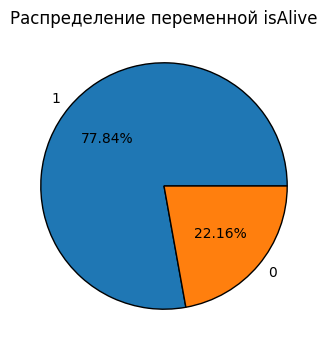

In [14]:
alive_counts = df_train['isAlive'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(alive_counts, labels=alive_counts.index, autopct='%1.2f%%', wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title("Распределение переменной isAlive")
plt.show()

Заметим, что датасет на сбалансирован по целевой переменной, а знчит необходимо использовать стратификацию и возможно оверсэмплинг

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

При кодировании испоьзуем one-hot-encoder

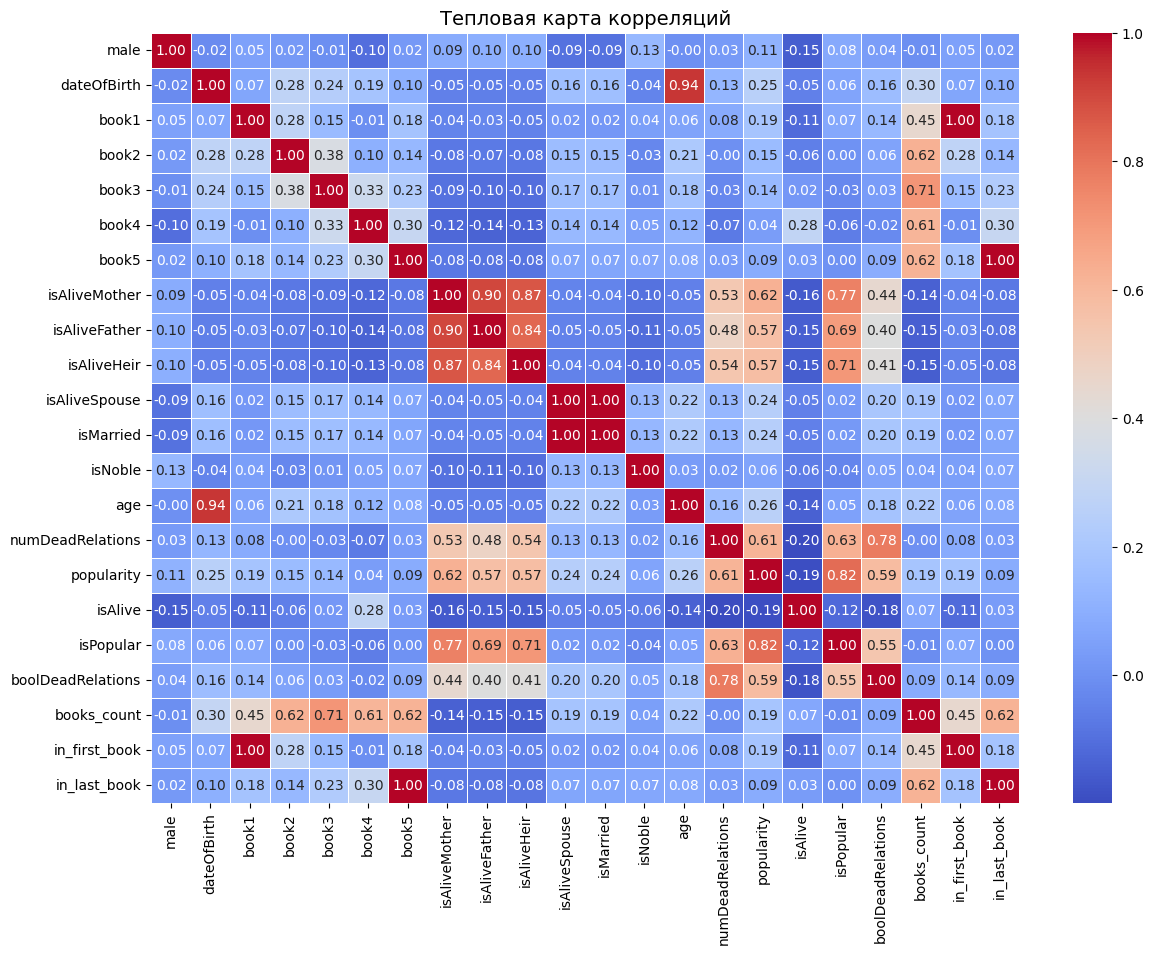

In [15]:
correlation = df_train.corr(numeric_only = True)
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Тепловая карта корреляций", fontsize=14)
plt.show()

Заметим, что признаки `'isAliveMother'` и `'isAliveFather'` имеют сильнуб зависимость друг с другом, тогда создадим новый прзнак `'alive_parents'`

Заметим, что признаки `'Age'` и `'DateOfBirth'` имеют сильнуб зависимость друг с другом, тогда создадим новый прзнак `'age_date'`

In [16]:
df_train['alive_parents'] = df_train['isAliveMother'] + df_train['isAliveFather']
df_train.drop(columns = ['isAliveMother', 'isAliveFather'], inplace = True)
df_train['age_date'] = df_train['age'] + df_train['dateOfBirth']
df_train.drop(columns = ['age', 'dateOfBirth'], inplace = True)

In [17]:
correlation = df_train.corr(numeric_only = True)

In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [19]:
categorical_cols = df_train.select_dtypes(include=['object']).columns
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns

label_encoders = {}


for col in categorical_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le


df_train.index = df_train.index
df_train.index.name = 'S.No'
df_train.head()

,title,male,culture,mother,father,heir,house,book1,book2,book3,...,isAlive,last_name,spouse_last_name,isPopular,boolDeadRelations,books_count,in_first_book,in_last_book,alive_parents,age_date
S.No,,,,,,,,,,,,,,,,,,,,,
1,137,1,41,11,8,0,554,0,0,0,...,0,747,98,1,1,0,0,0,1.0,-198.0
2,115,1,31,16,19,20,140,1,1,1,...,1,263,66,1,1,5,1,1,-198.0,305.0
3,163,1,48,16,19,20,547,0,0,0,...,1,358,98,0,0,1,0,0,-198.0,-198.0
4,145,0,38,16,19,20,14,0,0,0,...,0,25,84,0,0,0,0,0,-198.0,105.0
5,53,0,7,16,19,20,523,0,0,0,...,1,685,21,0,0,1,0,0,-198.0,305.0


Соединим закодированные и numeric данные

In [195]:
#df_train = pd.concat([df_train[numeric_cols], train_encode], axis = 1)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

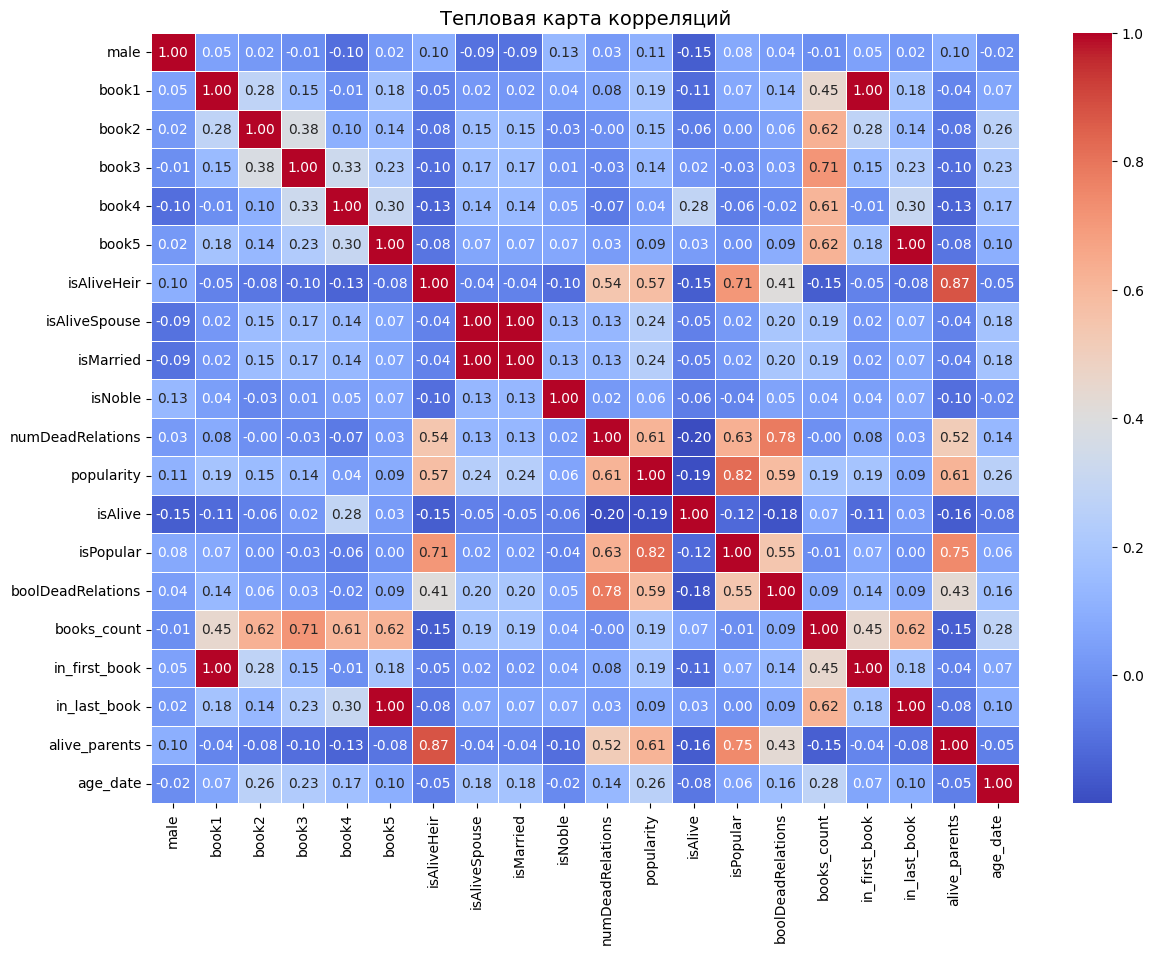

In [23]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Тепловая карта корреляций", fontsize=14)
plt.show()

Самые значимые факторы: популярность, число погибших родственников, наличие в последних книгах и количество появлений.
Учитывая невысокие коэффициенты корреляции (до 0.3), вероятно, что на выживаемость влияет множество факторов, а не только числовые характеристики

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [24]:
X = df_train.drop(columns = 'isAlive')
y = df_train['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [27]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [28]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [29]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, solver='saga', max_iter=5000)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [30]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# AdaBoost
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

# Gaussian Process
gaussian_process = GaussianProcessClassifier()
gaussian_process.fit(X_train, y_train)
y_pred_gp = gaussian_process.predict(X_test)

# Gaussian Naive Bayes
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_nb = gaussian_nb.predict(X_test)

# K-Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [31]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [32]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7846


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [33]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest: {accuracy_rf:.4f}')

accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f'Accuracy of AdaBoost: {accuracy_ada:.4f}')

accuracy_gp = accuracy_score(y_test, y_pred_gp)
print(f'Accuracy of Gaussian Process: {accuracy_gp:.4f}')

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy of Gaussian Naive Bayes: {accuracy_nb:.4f}')

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy of K-Neighbors: {accuracy_knn:.4f}')

accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy of SVC: {accuracy_svc:.4f}')

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy of Decision Tree: {accuracy_dt:.4f}')

Accuracy of Random Forest: 0.8564
Accuracy of AdaBoost: 0.8462
Accuracy of Gaussian Process: 0.6564
Accuracy of Gaussian Naive Bayes: 0.7692
Accuracy of K-Neighbors: 0.7538
Accuracy of SVC: 0.7846
Accuracy of Decision Tree: 0.7897


# Прогноз на test

In [34]:
test = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')
test.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              389 non-null    object 
 1   title             221 non-null    object 
 2   male              389 non-null    int64  
 3   culture           189 non-null    object 
 4   dateOfBirth       154 non-null    float64
 5   mother            3 non-null      object 
 6   father            4 non-null      object 
 7   heir              2 non-null      object 
 8   house             343 non-null    object 
 9   spouse            76 non-null     object 
 10  book1             389 non-null    int64  
 11  book2             389 non-null    int64  
 12  book3             389 non-null    int64  
 13  book4             389 non-null    int64  
 14  book5             389 non-null    int64  
 15  isAliveMother     3 non-null      float64
 16  isAliveFather     4 non-null      float64
 17

In [36]:
test.tail()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100
1945,Coldhands,NaN,1,NaN,NaN,NaN,NaN,NaN,Three-eyed crow,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.130435
1946,Tytos Lannister,Casterly Rock,1,NaN,220.0,NaN,NaN,NaN,House Lannister,Jeyne Marbrand,...,1,NaN,NaN,NaN,1.0,1,1,47.0,4,0.210702


In [37]:
test = preprocessing(test)
test = new_features(test)
test.drop(columns = ['name', 'spouse'], inplace = True)
test['alive_parents'] = test['isAliveMother'] + test['isAliveFather']
test.drop(columns = ['isAliveMother', 'isAliveFather'], inplace = True)
test['age_date'] = test['age'] + test['dateOfBirth']
test.drop(columns = ['age', 'dateOfBirth'], inplace = True)
# Кодируем категориальные признаки в test
numeric_cols = test.select_dtypes(include=['int64', 'float64']).columns
for col in categorical_cols:
    if col in test.columns:
        unseen_labels = set(test[col]) - set(label_encoders[col].classes_)

        if unseen_labels:
            label_encoders[col].classes_ = np.append(label_encoders[col].classes_, list(unseen_labels))

        test[col] = label_encoders[col].transform(test[col])

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              389 non-null    int64  
 1   male               389 non-null    int64  
 2   culture            389 non-null    int64  
 3   mother             389 non-null    int64  
 4   father             389 non-null    int64  
 5   heir               389 non-null    int64  
 6   house              389 non-null    int64  
 7   book1              389 non-null    int64  
 8   book2              389 non-null    int64  
 9   book3              389 non-null    int64  
 10  book4              389 non-null    int64  
 11  book5              389 non-null    int64  
 12  isAliveHeir        389 non-null    float64
 13  isAliveSpouse      389 non-null    float64
 14  isMarried          389 non-null    int64  
 15  isNoble            389 non-null    int64  
 16  numDeadRelations   389 non-

In [130]:
!pip install optuna
!pip install optuna-integration[sklearn]

In [40]:
import optuna
from optuna.integration import OptunaSearchCV
from optuna.distributions import IntDistribution
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': IntDistribution(50, 300, step=50),
    'max_depth': IntDistribution(5, 30),
    'min_samples_split': IntDistribution(2, 10),
    'min_samples_leaf': IntDistribution(1, 5)
}

randomized_search = OptunaSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    n_trials=20
)

randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке c кросс-валидацией:', randomized_search.best_score_)


<ipython-input-40-df9283d174ee>:15: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  randomized_search = OptunaSearchCV(
[I 2025-02-27 21:59:23,477] A new study created in memory with name: no-name-61f8708b-d8d2-4b00-aace-04acea343e5b
[I 2025-02-27 21:59:29,386] Trial 0 finished with value: 0.856890796375775 and parameters: {'n_estimators': 100, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.856890796375775.
[I 2025-02-27 21:59:34,906] Trial 2 finished with value: 0.8525989508822127 and parameters: {'n_estimators': 150, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.856890796375775.
[I 2025-02-27 21:59:35,103] Trial 1 finished with value: 0.8174571732511646 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.856890796375775.
[I 2025-02-27 21:5

Лучшая модель и её параметры:

 RandomForestClassifier(max_depth=16, min_samples_split=9, n_estimators=200,
                       random_state=42)
Метрика лучшей модели на тренировочной выборке: 0.8586001980851767


### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [91]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 5.59MB/s]


In [41]:
y_pred = randomized_search.best_estimator_.predict(test)

In [42]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [43]:
submission['isAlive'] = y_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [44]:
submission.to_csv("rf.csv", index=False)